**PAQUETERIAS NECESARIAS**

In [1]:
from modules.maquine_learning.Paq_ML import *

**CONDICIONES INICIALES DE NUESTRA SIMULACION**

In [2]:
time_input = timeit.default_timer()  # tic del PROCESO INICIAL
## CLASE DE LOS VALORES A TENER EN CUENTA
tf.compat.v1.disable_eager_execution()
config = tf.compat.v1.placeholder("float", [None])
config.cross_entropy = 1  
config.n_iterations  = 3000
config.dropout = 0.5
config.n_step_visual_process = 10
config.ite_corte = 1000
config.n_iterations_resul_mean = 10  # NUMERO DE VECES EN QUE SE REALIZARA LA MISMA OPERACION PARA OBTENER VALORES MEDIOS
## DEFINIR QUE PORCIENTO DE NUESTROS DATOSS SERAN UTILIZADOS
config.datos_porciento = .1 
config.datos_eleccion  = 1  # Se permutaran los valores para una corrida mas rapida

**ENTRADA DE DATOS**

In [3]:
INPUT = "/home/franky8939/GITHUP/DarkSUSY.git/data/h5_muon_histg/DarkSUSY_histg.h5"
if os.path.exists(INPUT):
    hf = h5py.File(INPUT, 'r')
else:
    print(" :: Datos de entrada inexistentes:: "); sys.exit()

**ORGANIZAR LA ENTRADA DE DATOS**

In [24]:
variable = "Entries"  # Variable de interes
Card_config = "_CMS_"  # Configuración de la card
INPUT = None
OUTPUT = None

for MNeuL in hf.keys(): 
    MNeuD_all = hf.require_group(MNeuL)
    for MNeuD in MNeuD_all.keys():
        MPhoD_all = hf.require_group(MNeuL + "/" + MNeuD)
        for MPhoD in MPhoD_all.keys():
            TcPhoD_all = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD)
            for TcPhoD in TcPhoD_all.keys():
                Data_Card = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD + 
                                             "/" + TcPhoD)
                for Card in Data_Card.keys():
                    FileROOT = hf.require_group(MNeuL + "/" + MNeuD + "/" + MPhoD + 
                                                "/" + TcPhoD + "/" + Card)
                    # print(Card)
                    if np.array(FileROOT.get("Entries"))<0:
                        continue
                    if Card==Card_config:
                        # var in the respective root
                        variable_histg = np.array(FileROOT.get(variable))
                        input_local = np.array(FileROOT.get("Input"))
                        if variable is "Entries":
                            if INPUT is None:
                                INPUT = input_local
                                OUTPUT = variable_histg/100
                            else:
                                INPUT = np.vstack((INPUT,input_local))
                                OUTPUT = np.vstack((OUTPUT, variable_histg/100))
                            
                        elif variable in ["PT", "Eta", "Phi", "D0", "DZ", "T", 
                                          "MassInv", "IsolationVar", "diMu_Entries"]:
                            for n in range(0, variable_histg.shape[1], round(variable_histg.shape[1]/5)):
                                if INPUT is None:
                                    INPUT = np.hstack((input_local, variable_histg[0,n]))
                                    OUTPUT = variable_histg[1,n]
                                else:
                                    INPUT = np.vstack((INPUT,
                                                       np.hstack((input_local, variable_histg[0,n])) ))
                                    OUTPUT = np.vstack((OUTPUT, variable_histg[1,n]))
                        else:
                            print(":: Variable no reconocida :: Stop process :: ")
                            sys.exit()
# hf.close()
#REACONDICIONAR LA INFORMACION INPUT EN UNA MATRIX PARA SU RAPIDO ACCESO
INPUT_LINEAL, INPUT_LINEAL_TEST, OUTPUT_LINEAL, OUTPUT_LINEAL_TEST = train_test_split(
    INPUT, OUTPUT, test_size = config.datos_porciento, shuffle = True)

print(INPUT_LINEAL.shape)
print(OUTPUT_LINEAL.shape)
print(INPUT_LINEAL_TEST.shape)
print(OUTPUT_LINEAL_TEST.shape)

(1395, 4)
(1395, 1)
(156, 4)
(156, 1)


**ENTRENAMIENTO**

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.38903796546246966
R2 score of training set is 0.9699823614081595


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.41281405031676277
R2 score of test set is 0.9611754025442155


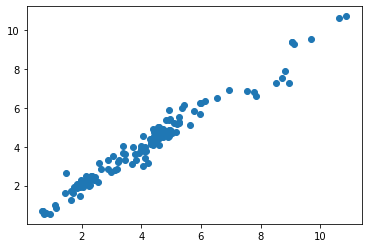

In [5]:
import pandas as pd
from sklearn import linear_model
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

X_train = INPUT_LINEAL
X_test = INPUT_LINEAL_TEST
Y_train = OUTPUT_LINEAL
Y_test = OUTPUT_LINEAL_TEST

"Creates a polynomial regression model for the given degree"
degree = 5

poly_features = PolynomialFeatures(degree=degree)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

plt.plot(OUTPUT_LINEAL_TEST, y_test_predict, 'o')
plt.show()

In [6]:
poly_model.predict(poly_features.fit_transform([[10, 9, 1, 0, 10]]))
# np.max(OUTPUT_LINEAL)
# INPUT_LINEAL

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 126 is different from 252)

In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import sklearn


regr = linear_model.LinearRegression()
regr.fit(INPUT_LINEAL, OUTPUT_LINEAL)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

predict = regr.predict(INPUT_LINEAL_TEST)

plt.plot(predict, OUTPUT_LINEAL_TEST, "o")
plt.show()
# prediction with sklearn
#print ('Predicted Stock Index Price: \n', regr.predict(INPUT_LINEAL_TEST))

# OTRA FORMA DE REGRESION 
# with statsmodels
model = sm.OLS(OUTPUT_LINEAL, sm.add_constant(INPUT_LINEAL)).fit()
predictions = model.predict(sm.add_constant(INPUT_LINEAL_TEST)) 
 
print_model = model.summary()
print(print_model)

plt.plot(predictions, OUTPUT_LINEAL_TEST, "o")
plt.show()
print(r2_score(predictions, OUTPUT_LINEAL_TEST))

In [ ]:
print(INPUT_LINEAL)
print(sm.add_constant(INPUT_LINEAL))


In [25]:
# example of making predictions for a regression problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from numpy import array
# generate regression dataset
# X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)
X = INPUT_LINEAL
y = OUTPUT_LINEAL
#scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
#scalarX.fit(X)
#scalarY.fit(y)
#X = scalarX.transform(X)
#y = scalarY.transform(y)
# define and fit the final model
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)

In [27]:
INPUT

array([[10.  ,  0.25,  0.25,  0.  ],
       [10.  ,  0.25,  0.25,  0.5 ],
       [10.  ,  0.25,  0.25,  1.  ],
       ...,
       [20.  ,  5.  ,  5.  , 40.  ],
       [20.  ,  5.  ,  5.  ,  5.  ],
       [20.  ,  5.  ,  5.  , 50.  ]])

In [ ]:
# print(X.shape)
print(model.predict(np.array([[10, 10, 0.25, 100]])))
plt.plot(model.predict(INPUT_LINEAL_TEST),OUTPUT_LINEAL_TEST, "o")
print(r2_score(model.predict(INPUT_LINEAL_TEST), OUTPUT_LINEAL_TEST))

[[0.3025449]]


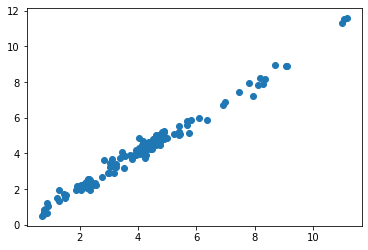

In [19]:
#print(X.shape)
print(model.predict(np.array([[20, 10, 0.25, 100]])))
plt.plot(model.predict(INPUT_LINEAL_TEST),OUTPUT_LINEAL_TEST, "o")
plot

In [15]:
INPUT_LINEAL_TEST[:1,:]
#

array([[20.,  1.,  5., 20.]])